# Load Data

In [1]:
import pandas as pd #import pandas to load and manipulate the data
pd.set_option('display.max_columns', None) #This prevents the table from being cut and allows all columns to be seen

In [2]:
# Import the data and view it
df = pd.read_csv(r'C:\Users\jimen\OneDrive\Escritorio\Deloitte_exam\churn_all.csv')
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Exploration & Preprocessing

In [3]:
# Get the shape to see how large/small the data set is
df.shape

(5000, 20)

In [4]:
df.describe()

,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,436.911400,7.755200,180.288900,119.834000,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,42.209182,13.546393,53.894699,442.739543,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,510.000000,52.000000,351.500000,9999.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Key insights from describe table:
- total_day_calls has an extreme max of 9999 which suggests possible outliers or data errors

- All min values of minutes/calls/charge are 0 which may represent inactive accounts instead of real customers

- number_customer_service_calls and all of the minutes columns might be right skewed due to large ranges and max which sometime indicate a long tail on the right (small percentage of high call usage which leads to skewness)

In [5]:
# Get the data types of the columns
df.dtypes

state                             object
area_code                          int64
phone_number                      object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
Churn                               bool
dtype: object

Three columns of importance:
- international_plan
- voice_mail_plan
- Churn

Each should be converted to binary integer 1/0 columns representing True/False or Yes/No since further analysis requires numerical values

In [6]:
# View the unique values of the categorical columns before data type conversion

# lambda is an anonymous fucntion that takes one column (x) and applies the .unique() method to each column
df[['international_plan','voice_mail_plan','Churn']].apply(lambda x: x.unique()) 

,international_plan,voice_mail_plan,Churn
0,no,yes,False
1,yes,no,True


In [7]:
# Find which columns have missing values
df.isnull().sum()

state                            0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
Churn                            0
dtype: int64

This is perfect, we have no missing values so we dont have to drop or replace any rows of information

### Data cleaning

In [8]:
# Create a copy df for data cleaning and analysis
df2 = df.copy()

array([[<Axes: title={'center': 'total_day_minutes'}>,
        <Axes: title={'center': 'number_customer_service_calls'}>]],
      dtype=object)

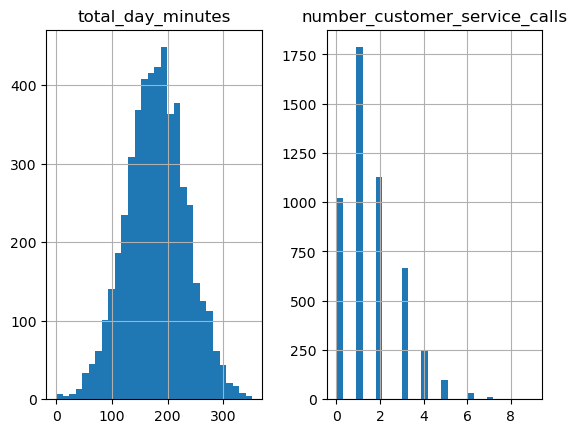

In [9]:
# Test skewness by visualizing the data distribution of number_customer_service_calls and total_day_minutes 

# Create a histogram
df[['total_day_minutes','number_customer_service_calls']].hist(bins=30) 

total_day_minutes 
- does not appear right skewed 
- histogram shows a bell shaped normal distribution

number_customer_service_calls 
- is right skewed
- data is concentrated on 0-2 service calls so majority of customers have fewer service calls and only a small percentage of customers have made 4-8 calls
- this is an issue for future modelling since models might ignore the importance of customers with 5+ calls given that 0-2 calls would be assumed as normal behaviour, leading to poor churn prediction
- a log transformation could help reduce the skew

In [10]:
import numpy as np

# Create a new feature based on customer service calls adjusted for skewness
df2['log_service_calls'] = np.log1p(df2['number_customer_service_calls'])

What a log transformation does:
- reduces skewness and makes the data more normally distributed
- minimizes the effects of extreme outliers
- improves model performance weighing all values fairly

In [11]:
# Drop outlier data

# Drop rows with total_day_calls = 9999 
df2 = df2[df2['total_day_calls'] != 9999]

In [12]:
df2.shape

(4990, 21)

10 rows of faulty data were dropped 

In [13]:
# Convert yes/no and True/False columns into 1/0 columns for future analysis

# Use .replace() for the yes/no columns and convert them to int
df2[['international_plan','voice_mail_plan']] = df2[['international_plan','voice_mail_plan']].replace({' yes': 1, ' no': 0})
df2[['international_plan', 'voice_mail_plan']] = df2[['international_plan', 'voice_mail_plan']].astype('int64')

# Directly covert boolean column into an int column
df2['Churn'] = df2['Churn'].astype('int64')

In [14]:
# Confirm column value and feature changes
df2.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,log_service_calls
0,KS,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.693147
1,OH,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.693147
2,NJ,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.000000
3,OH,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.098612
4,OK,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.386294


In [15]:
# Confirm data type changes
df2[['international_plan','voice_mail_plan','Churn']].dtypes

international_plan    int64
voice_mail_plan       int64
Churn                 int64
dtype: object

In [16]:
# Create four new features to simplify future analysis

# total_minutes will represent the sum of the customers day, evening, night minutes
df2['total_minutes'] = df2[['total_day_minutes','total_eve_minutes','total_night_minutes']].sum(axis=1)

# total_charge will represent the sum of the customers day, evening, night charges
df2['total_charge'] = df2[['total_day_charge','total_eve_charge','total_night_charge']].sum(axis=1)

# cost_per_minute will represent customers who pay more per minute which could increase churn risk
df2['cost_per_minute'] = df2['total_charge']/df2['total_minutes']

# high_service_calls will represent customers who have a high rate of service calls which could increase churn risk 
df2['high_service_calls'] = (df2['number_customer_service_calls'] >=4).astype(int)

In [17]:
# Identify if any inactive customers exist

# Inactive customers are customers with 0 minutes and charges all together
inactive_customers_df = df2.loc[(df2[['total_minutes', 'total_charge']].sum(axis=1) == 0)]

print(f'There are {inactive_customers_df.shape[0]} inactive customers')

There are 0 inactive customers


In [18]:
# Identify customers with at least one zero in the relevant columns
customers_with_zeros_df = df2.loc[(df2[['total_day_minutes', 'total_eve_minutes', 
                                        'total_night_minutes', 'total_intl_minutes', 
                                        'total_day_charge', 'total_eve_charge', 
                                        'total_night_charge', 'total_intl_charge']]
     .eq(0)  # Checks where values are exactly 0
     .any(axis=1))  # Returns True if at least one column is 0 in a row
]

print(f' There are {customers_with_zeros_df.shape[0]} customers with at least one zero in relevant columns')

 There are 28 customers with at least one zero in relevant columns


In [19]:
#Visualize the 28 row table to analyze on a case-by-case basis 
customers_with_zeros_df

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,log_service_calls,total_minutes,total_charge,cost_per_minute,high_service_calls
179,KS,408,411-4582,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,0,1.386294,725.6,73.36,0.101103,0
343,IN,408,376-4300,0,1,21,64.6,98,10.98,176.1,86,14.97,244.8,84,11.02,0.0,0,0.00,2,0,1.098612,485.5,36.97,0.076148,0
488,VT,510,345-1998,0,0,0,242.9,126,41.29,209.8,65,17.83,228.4,126,10.28,0.0,0,0.00,1,0,0.693147,681.1,69.40,0.101894,0
595,HI,408,360-2690,0,1,28,151.4,95,25.74,152.4,97,12.95,250.1,109,11.25,0.0,0,0.00,1,0,0.693147,553.9,49.94,0.090161,0
712,MO,415,340-9910,0,0,0,114.4,104,19.45,78.3,101,6.66,232.7,78,10.47,0.0,0,0.00,2,0,1.098612,425.4,36.58,0.085990,0
878,WI,415,383-6373,0,0,0,281.0,66,47.77,160.6,108,13.65,77.9,74,3.51,0.0,0,0.00,1,0,0.693147,519.5,64.93,0.124986,0
1028,KS,415,369-9465,0,0,0,222.8,114,37.88,215.9,113,18.35,223.5,122,10.06,0.0,0,0.00,1,0,0.693147,662.2,66.29,0.100106,0
1080,OH,415,363-2602,0,0,0,191.5,88,32.56,175.2,78,14.89,220.3,118,9.91,0.0,0,0.00,0,0,0.000000,587.0,57.36,0.097717,0
1345,SD,415,392-2555,0,0,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1,1.609438,326.7,21.09,0.064555,1
1397,VT,510,413-7655,0,0,0,0.0,0,0.00,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0,0.693147,360.9,23.93,0.066306,0


After examining each case where a customer has either a minute or charge column value = 0, it is confirmed there is no inactive customers in the data set (no customer where all minutes and all charges = 0)

### Data cleaning conclusion

In the data cleaning section the following was achieved:
- right skewed values were identified
- outlier day calls (values of 9999) were deleted
- categorical column values were converted to binary integers with 1/0 values
- five new features were created to simplify future analysis (total_minutes, total_charge, cost_per_minute, high_service_calls, log_service_calls)

Reasoning behind the creation of total_minutes and total_charge columns and excluding intl data from them:
- Billing models are based on minutes (for every minute you are charged 'x' amount of €) and churn is often linked to higher costs so aggregating minutes and charge makes future analysis simpler
- Calls can have some effect on churn but dont affect charge, its likely a weak predictor of churn
- total_int_minutes (mean: 10.26, max: 20) is very small relative to total_day_minutes (mean: 180, max: 351.5)
- total_int_calls (mean: 4.44, max: 20) suggests international calls are rare 
- total_int_charge has a mean of 2.77 vs total_day_charge of 30.65 
- international calls dont contribute much to overall charge of a customer and they can be omitted from total_minutes and total_charges

### Correlation study

In [20]:
# Create a new data frame with only numerical values
df3 = df2.drop(columns=['state','phone_number'])
df3.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,log_service_calls,total_minutes,total_charge,cost_per_minute,high_service_calls
0,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.693147,707.2,72.86,0.103026,0
1,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.693147,611.5,55.54,0.090826,0
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.000000,527.2,59.00,0.111912,0
3,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1.098612,558.2,65.02,0.116482,0
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1.386294,501.9,49.36,0.098346,0


<Axes: >

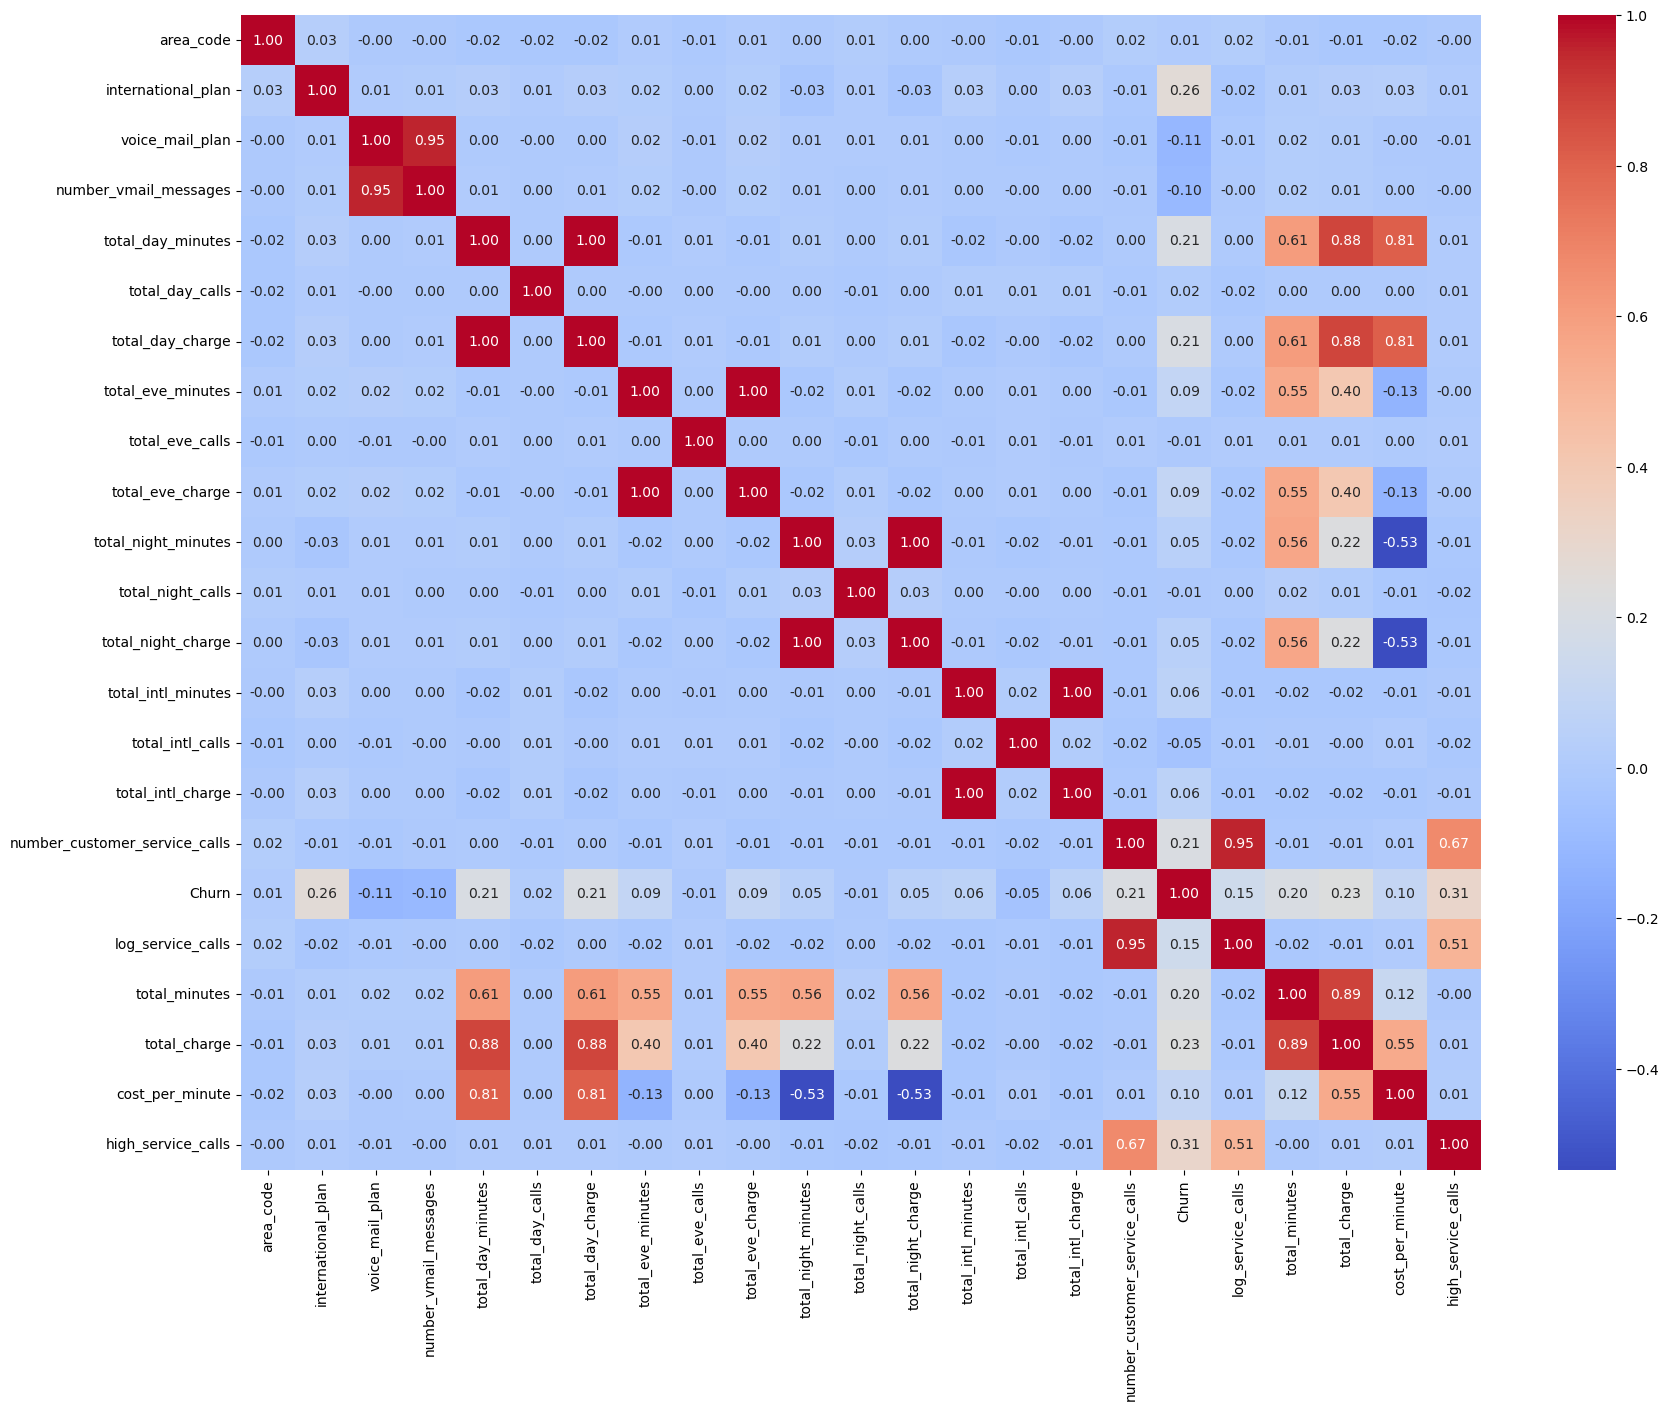

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation heatmap to visualize correlation between numerical values

# Set figure size
plt.figure(figsize=(20,15)) #set figure size 

# annot=True displays correlation values inside each cell of heatmap and .2f limits values to two decimal places
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='.2f')

When using .corr() in pandas, it uses Pearson correlation by default. A correlation coefficient:
- close to +1: large positive correlation
- close to -1: large negative correlation
- close to 0: no correlation

Therefore, anything worse than +/-0.1 coefficient will not be considered for further analysis

In [22]:
# Drop the statistically irrelevant columns
df4 = df3.drop(columns = ['area_code','total_eve_calls','total_night_calls','total_intl_calls','total_eve_minutes',
                         'total_eve_charge','total_night_minutes','total_day_calls','total_night_charge','total_intl_minutes',
                         'total_intl_charge','number_vmail_messages','cost_per_minute'])

<Axes: >

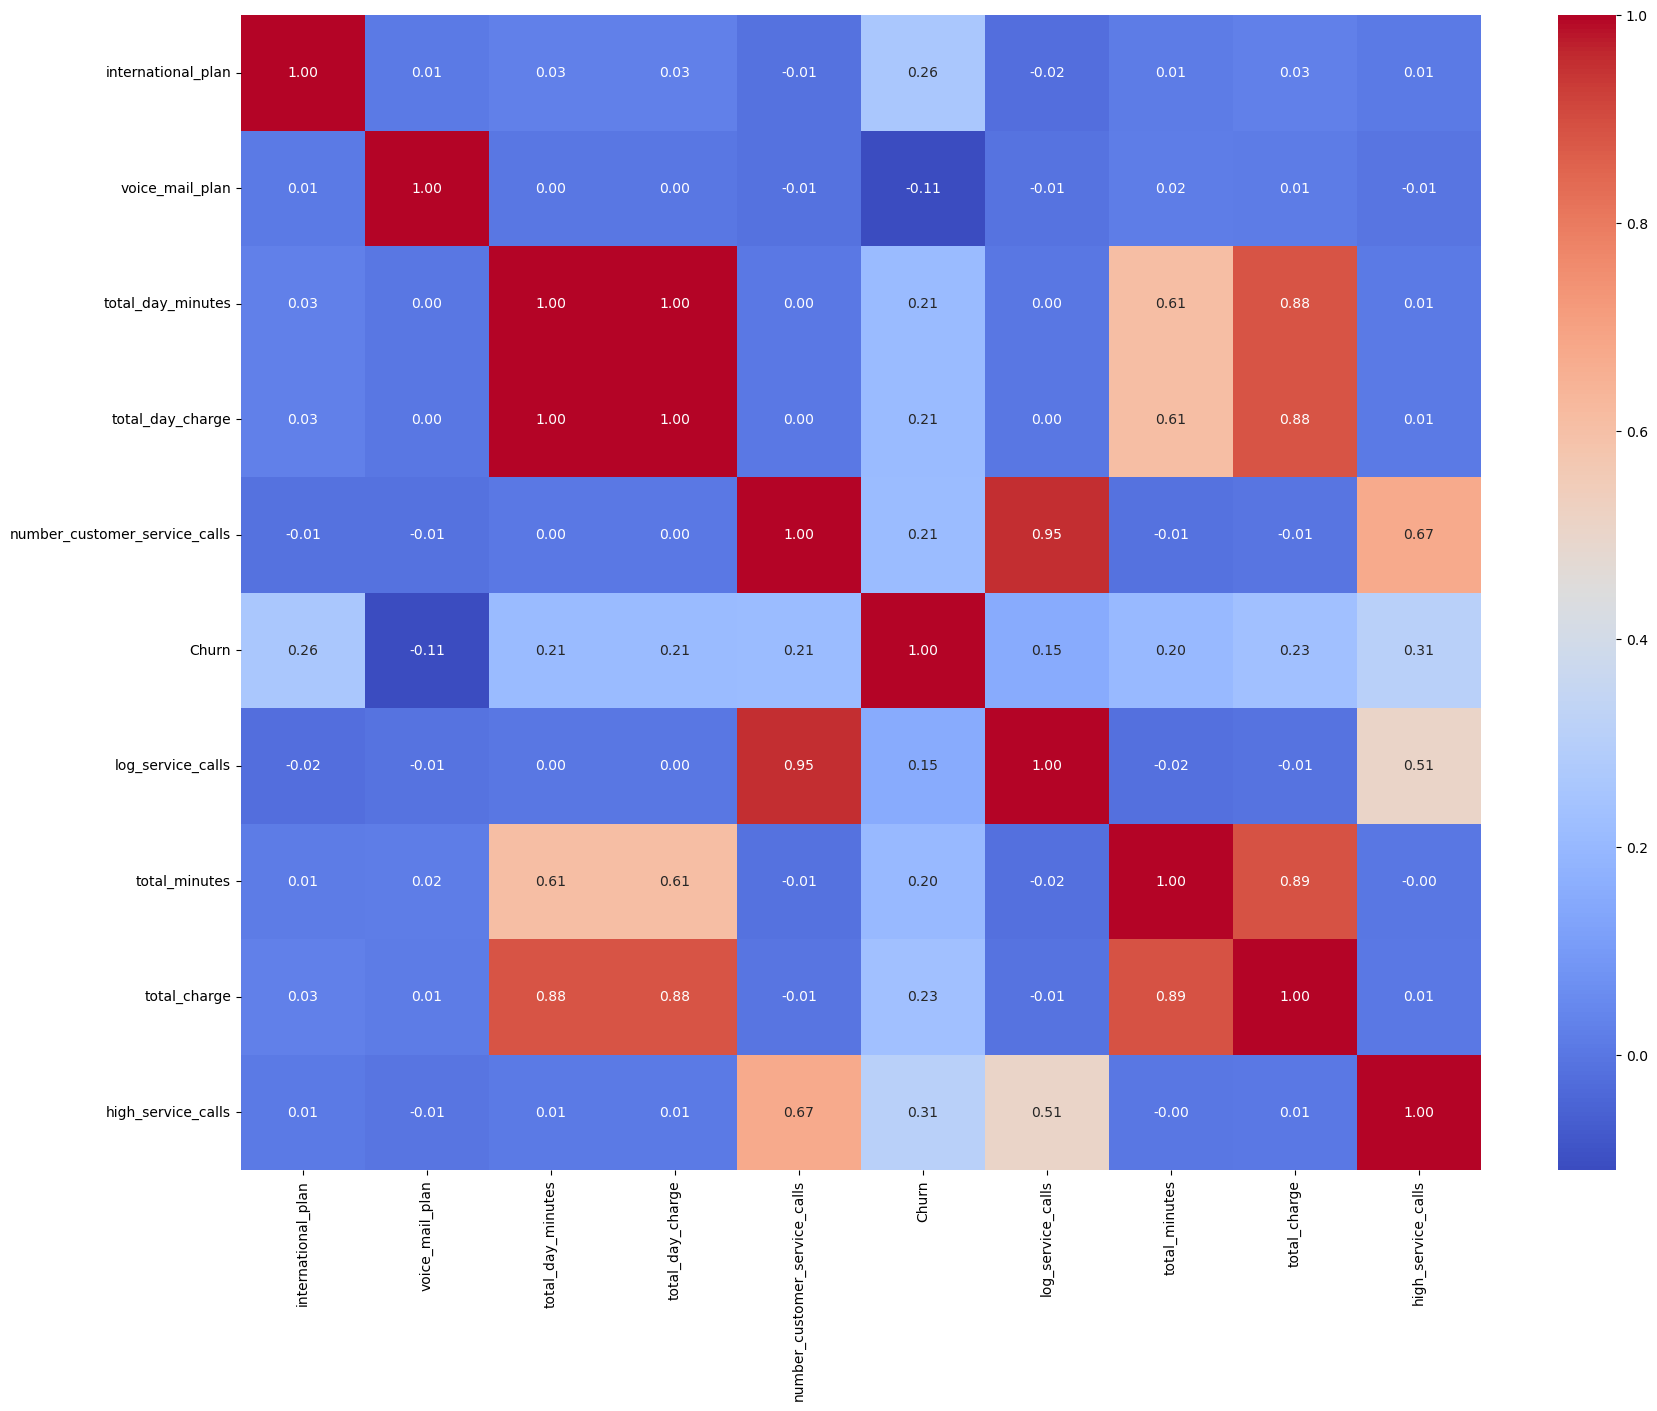

In [23]:
# Create a smaller and more relevant correlation heatmap
plt.figure(figsize=(20,15)) 
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Based on this correlation heatmap a predictive model will be trained with the most predictive features for Churn including:
- international_plan
- voice_mail_plan
- total_day_minutes
- total_day_charge
- number_customer_service_calls
- log_service_calls
- total_minutes
- total_charge
- high_service_calls

# Model Training

Text(0.5, 1.0, 'Distribution of Churned vs. Non-Churned Customers')

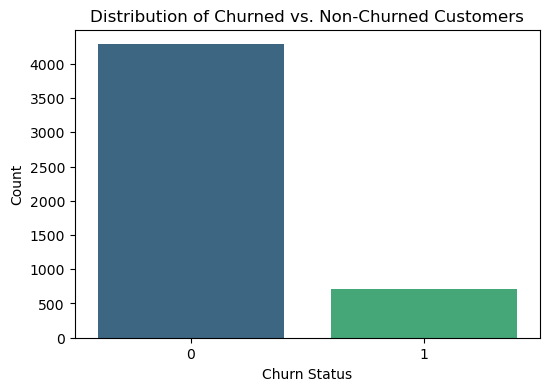

In [24]:
# Visualize churners vs non-churners in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df4, palette='viridis')

# Add labels and title
plt.xlabel("Churn Status")
plt.ylabel("Count")
plt.title("Distribution of Churned vs. Non-Churned Customers")

In [25]:
# Represent churn distribution in %
print(df4['Churn'].value_counts(normalize=True))

Churn
0    0.858317
1    0.141683
Name: proportion, dtype: float64


Churn = 1 is < 20%. This means the minority class (churners) is imbalanced so SMOTE (Synthetic Minority Oversampling) will be applied to the prediction model

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split data into feature and target variables
X = df4[['international_plan','voice_mail_plan','total_day_minutes','total_day_charge','number_customer_service_calls',
         'log_service_calls','total_minutes','total_charge','high_service_calls']]
Y = df4['Churn']

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

SMOTE technique reasoning:
- It balances classes without losing information although synthetic data might not reflect real-world patterns

Logic behind SMOTE code:
- stratify = Y ensures the train and test sets have the same class proportions as the original dataset
- since churners only make up 14% of the data, stratification prevents the test set from having too few churners, which could bias evaluation. For example, without stratification the train set might randomly get only 5% churners instead of 14%, making it harder for the model to learn
- SMOTE is not applied to the test set because the test set should represent real-world data 
- In this real-world only 14% are churners, so SMOTE is applied to the test set, churners will artificially be increased making evaluation unrealistic

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, Y_train_smote)

# Predictions and evaluation
Ypredict_rf = rf.predict(X_test)
print(classification_report(Y_test, Ypredict_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       857
           1       0.76      0.71      0.74       141

    accuracy                           0.93       998
   macro avg       0.86      0.84      0.85       998
weighted avg       0.93      0.93      0.93       998



# Model Evaluation and Tuning

Precision
- Measures how many predicted churners (1) were actually churners
- 76% of predicted churners actually churned 

Recall
- Measures how many actual churners (1) were correctly identified by the model
- 71% of actual churners were correctly identified 
- This represents a good recall for churners although there is room for improvement

F1-Score
- F1-score is the harmonic mean of Precision and Recall so a high F1-score means the model performs well overall
- 0.74 is a pretty good F1-score

Accuracy
- Measures how many total predictions were correct
- 93% of all predictions were correct but this is can be misleading since most of the correct predictions could belong to the non-churners

To improve model performance, false positives need to be reduced (improving precision) and correct predictions need to increase (improve recall and F1-score). Feature importance and threshold techniques will be applied

### Check feature importance

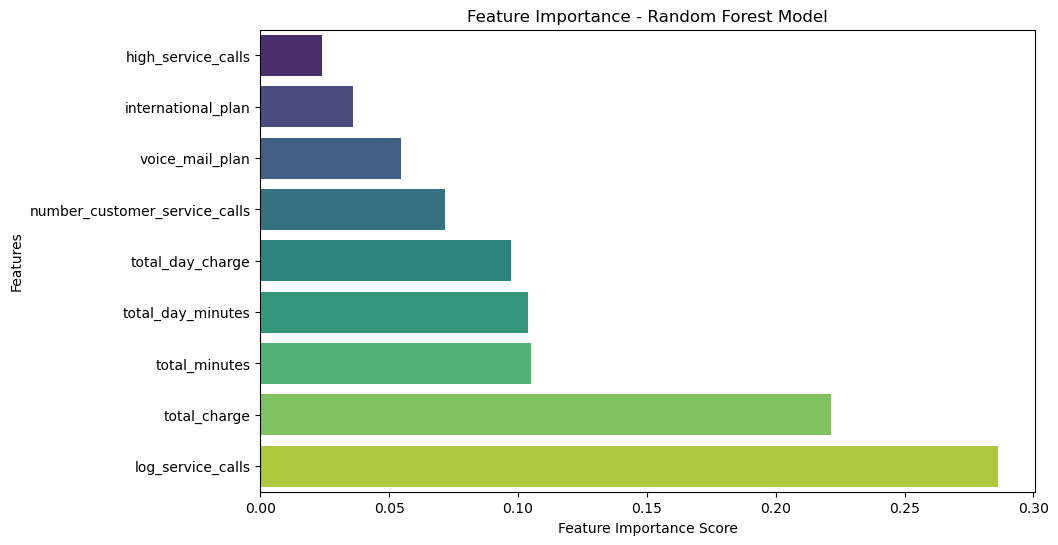

Feature Importance Scores:
 high_service_calls               0.023955
international_plan               0.035819
voice_mail_plan                  0.054652
number_customer_service_calls    0.071648
total_day_charge                 0.097100
total_day_minutes                0.104028
total_minutes                    0.104840
total_charge                     0.221482
log_service_calls                0.286474
dtype: float64


In [28]:
# Extract feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

# Sort and visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.sort_values(), y=feature_importance.sort_values().index, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest Model")
plt.show()

# Print numerical importance values
print("Feature Importance Scores:\n", feature_importance.sort_values(ascending=True))

- high_service_calls (0.024) and number_customer_service_calls (0.072) should be removed since they have little effect on the model and are redundant due to log_service_calls
- total_day_minutes and total_day_charge should be removed since they have little effect on the model and are redundant due to total_charge and total_minutes
- international_plan and voice_mail_plan (0.036 and 0.055 respectively) will be considered for removal but could have small business effects

### Remove irrelevant and redundant features

In [29]:
X_optimized = X.drop(columns=['high_service_calls','total_day_minutes','total_day_charge','number_customer_service_calls'])

# Note: When international_plan and/or voice_mail_plan was removed from the model, recall suffered so it will remain in the model

# Split into training and test sets
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_optimized, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTE to handle class imbalance
X_train2_smote, Y_train2_smote = smote.fit_resample(X_train2, Y_train2)

# Train new model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2_smote, Y_train2_smote)

# Predictions and evaluation
Ypredict_rf2 = rf2.predict(X_test2)
print(classification_report(Y_test2, Ypredict_rf2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       857
           1       0.75      0.74      0.75       141

    accuracy                           0.93       998
   macro avg       0.86      0.85      0.85       998
weighted avg       0.93      0.93      0.93       998



### RF1 and RF2 comparison

Precision
- RF1: 76%
- RF2: 75% (slightly worse than RF1)

Recall
- RF1: 71%
- RF2: 74% (slightly better than RF2)

F1-score
- RF1: 0.74
- RF2: 0.75

RF2 is the best choice because it balances recall (74%) and precision (75%) and has a solid F1-score (0.75)
- An accuracy of 93% also ensures the model is reliable
- Higher recall is prioritized because in a churn sitatuion as a telcom company one would rather call 500 non churners (False positives) than miss 500 real churners (True positives)

### Check AUC-ROC Score for RF2

In [30]:
from sklearn.metrics import roc_auc_score

Yprob = rf2.predict_proba(X_test2)[:, 1]
auc_score = roc_auc_score(Y_test2, Yprob)
print("Final Model AUC-ROC Score:", auc_score)

Final Model AUC-ROC Score: 0.9300214338323527


### Identify Top 500 Customers

In [31]:
# Create a new Data Frame for tracking probabilities
churn_results = X_test2.copy()

# Get churn probabilities
churn_results['churn_probability'] = rf2.predict_proba(X_test2)[:, 1]

# Rank customers by churn probability
top_500_customers = churn_results.nlargest(500, 'churn_probability')

# Randomly selecting 500 customers
random_customers = churn_results.sample(n=500, random_state=42)

# Comparing average churn probability
print("Avg churn probability for model-selected customers:", top_500_customers['churn_probability'].mean())
print("Avg churn probability for random-selected customers:", random_customers['churn_probability'].mean())

Avg churn probability for model-selected customers: 0.35312
Avg churn probability for random-selected customers: 0.18674000000000002


In [32]:
# Save the top 500 customers
top_500_customers.to_csv("Top_500_High_Risk_Customers.csv", index=False)

# Summary and Conclusions 

### 1. Understanding key characteristics of customers who are likely to churn

Through feature selection and importance analysis, the following characteristics were found to be the strongest indicators of churn:

High Service Calls (log_service_calls)
- Most important churn predictor (28.6%)
- Frequent customer service calls indicate dissatisfaction, leading to churn
- Business Insight: Customers with high service calls need proactive engagement and service improvements.

High Total Charge (total_charge)
- Customers with higher monthly charges are more likely to churn (22.1% importance).
- Business Insight: Offering discounts or personalized billing plans could improve retention.

High Total Minutes (total_minutes)
- Customers who use more minutes tend to churn more (10.4%).
- Business Insight: These customers may be price-sensitive and could benefit from customized plans.

International Plan (international_plan)
- Weak predictor (3.5%) but still relevant.
- Customers on international plans might churn due to better offers from competitors.
- Business Insight: Consider offering loyalty perks to international customers.

Key findings:
- Service issues and high billing costs drive churn.
- Customers making frequent calls to support are at high risk.
- Retention should focus on offering better customer service and competitive pricing.

### 2. Predicting the customer's likelihood of leaving (Churn probability)

A Random Forest model with SMOTE applied
- Class imbalance (14% churn rate) was addressed using SMOTE
- The final model (RF2) achieved an AUC-ROC score of 0.93 which indicates great predictive performance

Other Class 1 (churners) metrics anything above 0.7 is considered a good value

Precision: 0.75
- Measures how many predicted churners (1) were actually churners


Recall: 0.74
- Measures how many actual churners (1) were correctly identified by the model


F1-score: 0.75
- F1-score is the harmonic mean of Precision and Recall so a high F1-score means the model performs well overall


Overall accuracy: 93%
- Measures how many total predictions were correct


Conclusions
- This model demonstrates a balanced recall and precision which ensures true churners are detected while minimizing false positives
- Its high accuracy (93%) makes it highly reliable

### 3. Identifying the top 500 customers to contact first

- The model predicted churn probability for each customer and ranked them highest to lowest 
- Selected the top 500 at-risk customers and saved them in a csv
- These 500 customers should be contacted first to prevent churn
- Retention campaigns and proactive outreach could reduce churn-related revenue loss

### 4. Evaluating the strategy vs random selection

- Model-selected customers had an average churn probability of 0.3531
- Random-selected customers had an average churn probability of 0.18674

This demonstrates that model-selected customers are almost twice as likely to churn compared to random-selected customers and confirms that the model is a much better approach than a random one. Using this strategy minimizes resource waste and ensures targeted retention efforts

### 5. Business recommendations and future model enhancements

1 Contact top 500 at-risk customers
- Offer personalized discounts or loyalty incentives
- Improve customer service quality to minimize the effects of frequent complaints

2 Implement early detection systems
- Monitor high amount of service calls and charge complaints for early detection

3 Optimize pricing and plans
- Customized plans for high-minute users

4 Model Improvement
- Compare performance with other models (XGBoost, Logistic Regression)
- Expand churn prediction to identify customers who might churn in 6-12 months